In [2]:
import aplpy
from astropy.io import fits
from astropy import units as u
from astropy.wcs import WCS
import pylab as plt
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import numpy as np
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from mpl_toolkits.axes_grid1 import make_axes_locatable
import astropy

In [3]:
pars = '/Users/josh/GitHub/W51/data/par_maps.fits'
cube = fits.open(pars)[0]
cube_wcs = WCS(cube.header)

Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


(50.0, 270.0, 60.0, 240.0)

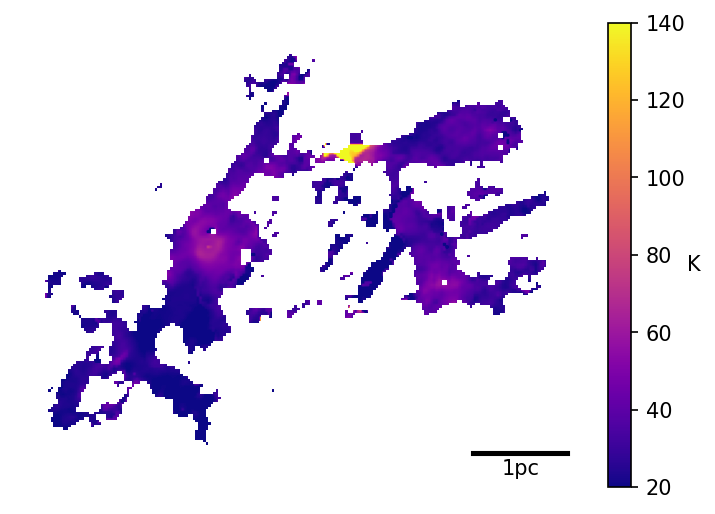

In [11]:
#tkin
plt.figure(figsize=(6,4.1), dpi=150)
ax = plt.subplot(projection=cube_wcs.celestial)
ax.set(xlim=(50,270), ylim=(60,240))
ax.coords[0].set_ticks_visible(False)
ax.coords[1].set_ticks_visible(False)
ax.coords[0].set_ticklabel_visible(False)
ax.coords[1].set_ticklabel_visible(False)
ax.set_axis_off
plt.imshow(cube.data[0,:,:], origin='lower', cmap='plasma', vmin=20, vmax=140)
cbar = plt.colorbar()
cbar.ax.set_ylabel('K', rotation=0)
plt.box(on=None)


# FOR SCALEBAR #
deg = astropy.wcs.utils.proj_plane_pixel_scales(cube_wcs)[0]
dist = 5.41 * u.kpc
pix_dist = np.deg2rad(deg) * dist
numpix = 1*u.pc / pix_dist.to(u.pc)
scalebar = AnchoredSizeBar(ax.transData,
                           numpix, '1pc', 'lower right', 
                           pad=0.1,
                           color='black',
                           frameon=False,
                           size_vertical=1)
ax.add_artist(scalebar)
#plt.title('Kinetic Temperature (K)', fontsize=18)
plt.axis('off')
#plt.savefig('/Users/josh/GitHub/W51/fig_products/tkin_new.pdf', bbox_inches='tight')
#plt.close()

In [50]:
import astropy
deg = astropy.wcs.utils.proj_plane_pixel_scales(cube_wcs)[0]


In [57]:
dist = 5.41 * u.kpc
pix_dist = deg * dist

In [58]:
pix_dist.to(u.pc)
50*u.pc / pix_dist.to(u.pc)

<Quantity 33.27171904>

In [118]:
tl = "ax.imshow(cube.data[0,:,:], origin='lower', cmap='plasma', vmin=20, vmax=140)"
tr = "ax.imshow(cube.data[2,:,:], origin='lower', cmap='bone', vmin=14, vmax=17.5)"
bl = "ax.imshow(cube.data[3,:,:], origin='lower', cmap='inferno', vmin=0, vmax=4)"
br = "ax.imshow(cube.data[4,:,:], origin='lower', cmap='cividis', vmin=40, vmax=74)"
plots = ((tl,tr),(bl,br))

tl,tr = "'K'", "r'$log_{10}$ g $m^{-3}$'"
bl,br = "'km/s'", "'km/s'"
labels = ((tl,tr),(bl,br))

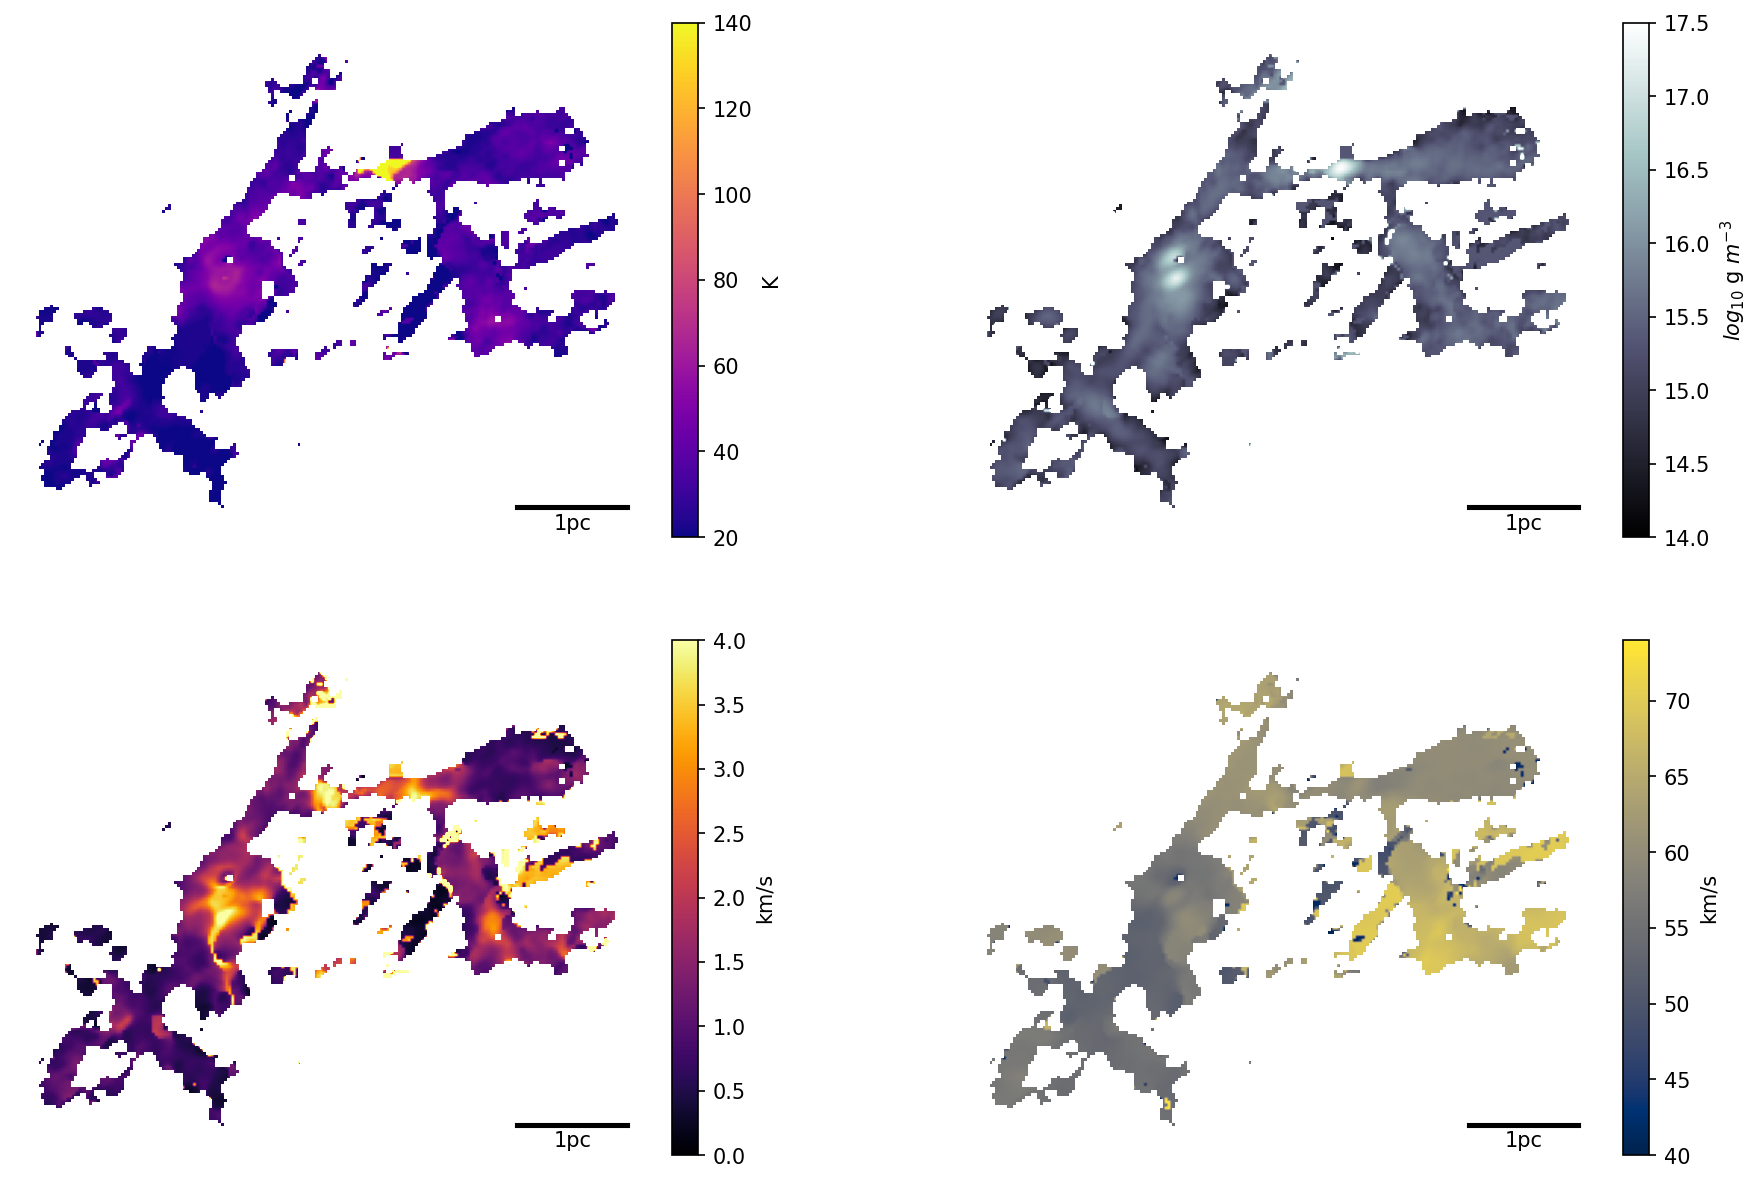

In [122]:
fig, axs = plt.subplots(2, 2, figsize=(15,10), dpi=150)

for col in range(2):
    for row in range(2):
        ax = axs[row, col]
        pcm = eval(plots[row][col])
        cbar = fig.colorbar(pcm, ax=ax)
        ax.set_xlim(55,265)
        ax.set_ylim(65,240)
        scalebar = AnchoredSizeBar(ax.transData,
                           numpix, '1pc', 'lower right', 
                           pad=0.1,
                           color='black',
                           frameon=False,
                           size_vertical=1)
        ax.add_artist(scalebar)
        ax.axis('off')
        cbar.ax.set_ylabel(eval(labels[row][col]), rotation=90)
#plt.show()
plt.savefig('/Users/josh/GitHub/W51/fig_products/four_panel_parmap.pdf', bbox_inches='tight')

In [115]:
eval(plots[0][0])

In [33]:
plots[ax]

TypeError: tuple indices must be integers or slices, not AxesSubplot

In [34]:
row

1

In [35]:
col

1